En este pequeño proyecto, utilizará el algoritmo k-means para segmentar casas según sus coordenadas y su ingreso medio.

Instrucciones

Agrupación de casas

Crearemos 6 grupos de viviendas basados ​​solo en su 'latitud', 'longitud' y su columna 'ingreso medio'.

Enlaces de conjuntos de datos:

https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv

In [25]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install shutil
#!pip install sqlalchemy
#!pip install os


In [39]:
# Importo las librerias

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt


Cargare el conjunto de datos

Luego cree un nuevo marco de datos con solo la columna 'latitud', 'longitud' e 'ingreso medio' para crear nuestros grupos.

In [28]:
houses = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [29]:
houses.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11217,4.2731,34.0,5.451117,1.001397,2054.0,2.868715,33.80,-117.93,2.180
20139,2.6786,21.0,5.008264,1.088843,1379.0,2.849174,34.31,-119.10,1.840
1223,2.0417,17.0,5.260638,1.083333,1387.0,2.459220,38.19,-120.67,0.926
12815,2.6745,5.0,4.332298,1.158385,638.0,1.981366,38.61,-121.50,2.250
12995,3.7426,20.0,5.940678,1.000000,676.0,2.864407,38.68,-121.24,1.355


In [30]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
houses.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

No tenemos datos faltantes, contamos con 20640 observaciones y nueve columnas

Crea una instancia del algoritmo kmeans. 

In [33]:
X = houses.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Luego, cree una nueva característica de 'clúster' en su conjunto de datos y prediga el clúster ajustando las 3 columnas que tiene.

In [34]:
from sklearn.cluster import KMeans

In [35]:
# Creo una nueva caracteristica
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,1


Utilice el gráfico de "relplot" de seaborn para visualizar sus nuevos clústeres.

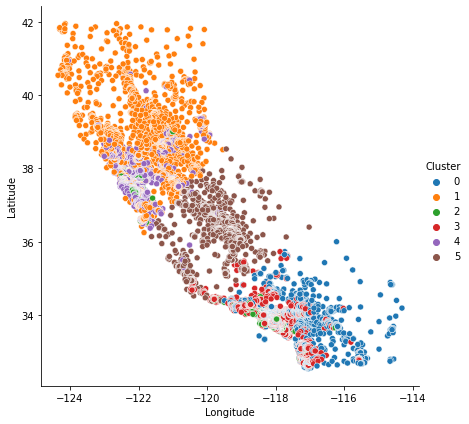

In [36]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

In [41]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
import seaborn as sns

Probare el metodo del codo para conocer el optimo de cluster

In [42]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Calculo la distancia para cada punto

In [43]:
dist = pairwise_distances(X_scaled)

In [45]:
import matplotlib.pyplot as plt

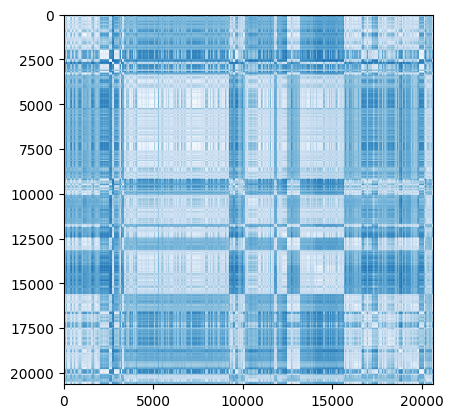

In [48]:
plt.imshow(dist, cmap='Blues')
plt.show()

In [51]:
k = range(1,10)
wss = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(X_scaled)
    wss_inertia = kmeans.inertia_
    wss.append(wss_inertia)

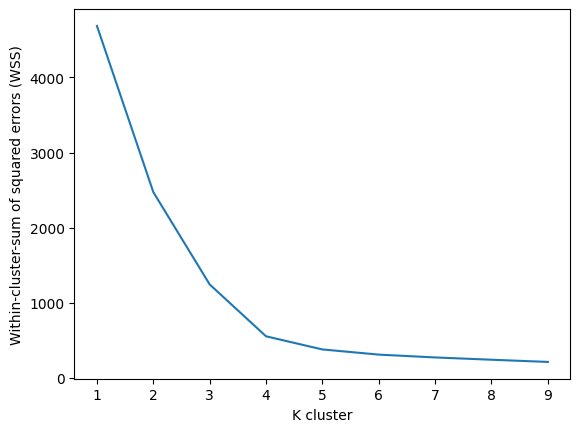

In [52]:
plt.plot(k, wss)
plt.ylabel('Within-cluster-sum of squared errors (WSS)')
plt.xlabel('K cluster')
plt.show()

In [53]:
# Creo una segunda caracteristica
kmeans_1 = KMeans(n_clusters=3)
X["Cluster_2"] = kmeans_1.fit_predict(X)
X["Cluster_2"] = X["Cluster_2"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster,Cluster_2
0,8.3252,37.88,-122.23,4,1
1,8.3014,37.86,-122.22,4,1
2,7.2574,37.85,-122.24,4,1
3,5.6431,37.85,-122.25,4,1
4,3.8462,37.85,-122.25,1,1


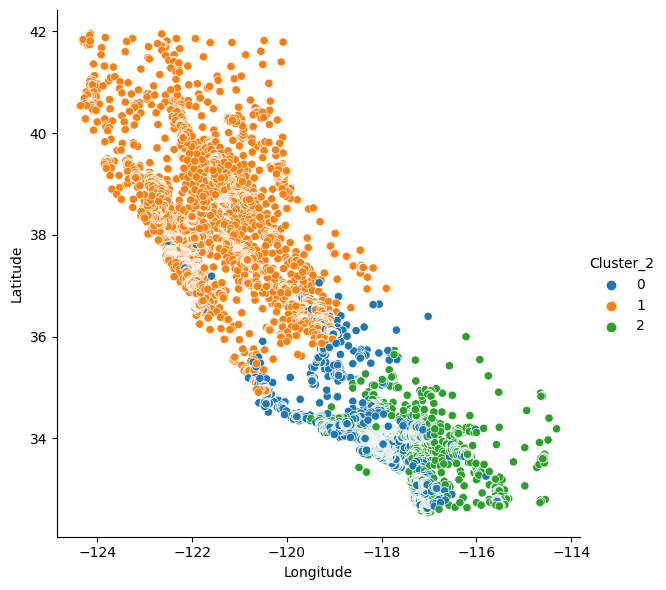

In [54]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster_2", data=X, height=6,
);